<a href="https://colab.research.google.com/github/FedeSanta777/AIFundamentals/blob/main/Copia_di_Homework_Fondamenti_di_IA_AA_2023_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

url='https://drive.google.com/file/d/12dUeEO_rkButPD79pOteFoSSeuIBg5qt/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dataset = pd.read_csv(dwn_url)

# About The Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (**FAVC**), Frequency of consumption of vegetables (**FCVC**), Number of main meals (**NCP**), Consumption of food between meals (**CAEC**), Consumption of water daily (**CH20**), and Consumption of alcohol (**CALC**). The attributes related with the physical condition are: Calories consumption monitoring (**SCC**), Physical activity frequency (**FAF**), Time using technology devices (**TUE**), Transportation used (**MTRANS**)
variables obtained :
**Gender**, **Age**, **Height** and **Weight**.

**NObesity** values are:

* Underweight
* Normal
* Overweight
* Obesity I
* Obesity II
* Obesity III

In [2]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset = dataset.sample(frac=1)
dataset_training_4_print = dataset[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_dummies = pd.get_dummies(dataset, dtype=int)
dataset = dataset.sample(frac=1).reset_index(drop=True)

dataset_training = dataset[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset[int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE):]

dataset_training_dummies = dataset_dummies[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test_dummies = dataset_dummies[int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE):]

print(dataset)

      Gender        Age    Height     Weight family_history_with_overweight  \
0     Female  20.000000  1.660000  60.000000                            yes   
1       Male  22.661556  1.660324  94.189167                            yes   
2       Male  22.000000  1.880000  90.000000                            yes   
3     Female  18.000000  1.550000  56.000000                             no   
4     Female  23.000000  1.615854  80.615325                            yes   
...      ...        ...       ...        ...                            ...   
2106  Female  19.431662  1.631662  82.000000                            yes   
2107    Male  19.637947  1.809101  85.000000                            yes   
2108    Male  21.052016  1.693820  99.530971                            yes   
2109    Male  21.084625  1.787264  58.585146                            yes   
2110    Male  21.033794  1.625891  70.000000                             no   

     FAVC      FCVC       NCP       CAEC SMOKE     

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
#import warnings
%matplotlib inline


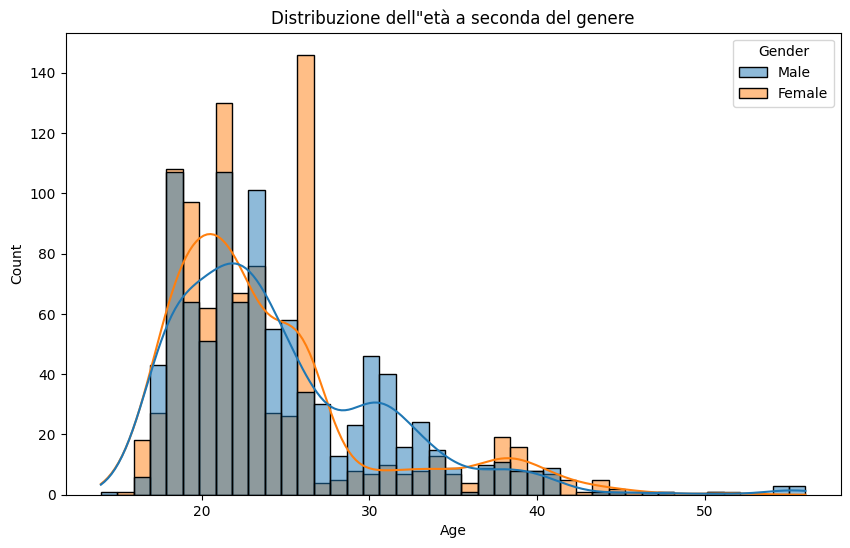

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset_training_4_print, x="Age", kde=True, hue="Gender")
plt.title("Distribuzione dell\"età a seconda del genere")
plt.show()

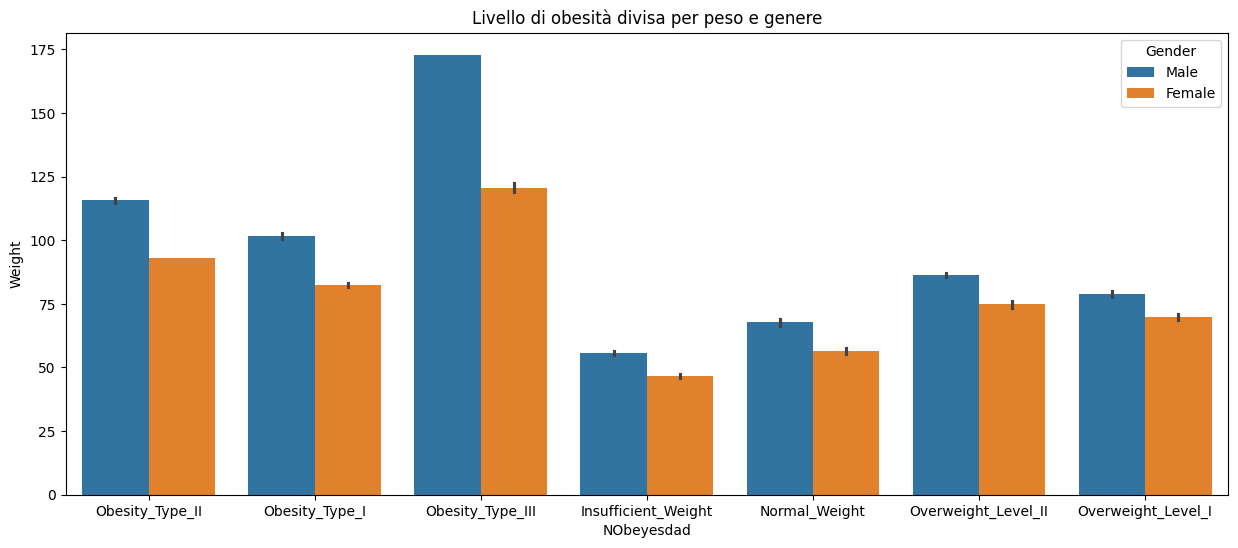

In [6]:
plt.figure(figsize=(15, 6))
sns.barplot(data=dataset_training_4_print, x="NObeyesdad", y="Weight", hue="Gender")
plt.title("Livello di obesità divisa per peso e genere")
plt.show()

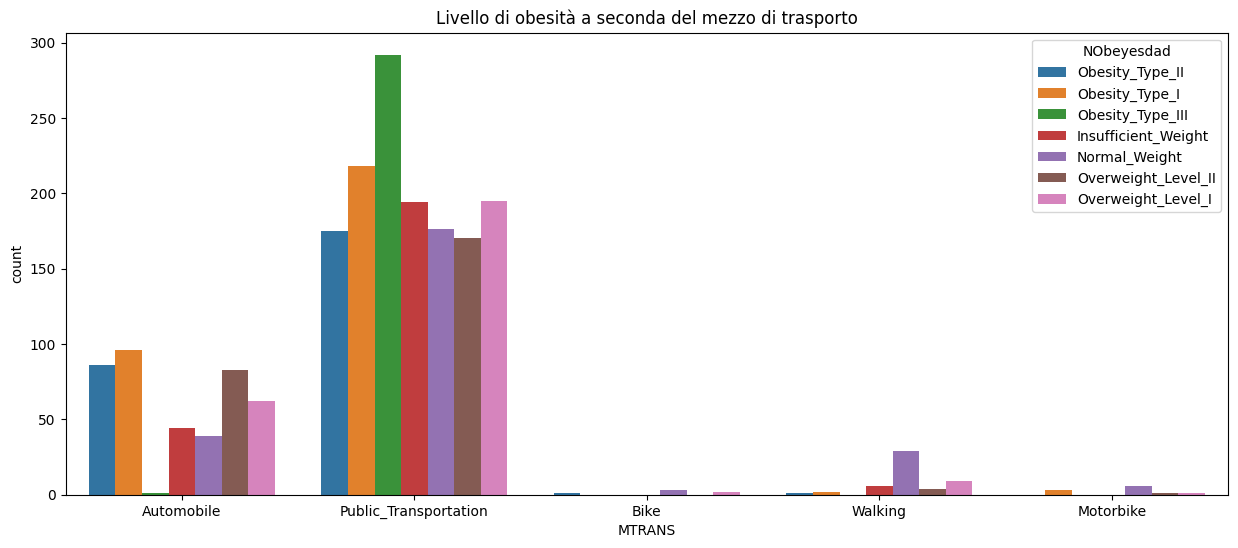

In [7]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training_4_print, x="MTRANS", hue="NObeyesdad")
plt.title("Livello di obesità a seconda del mezzo di trasporto")
plt.show()

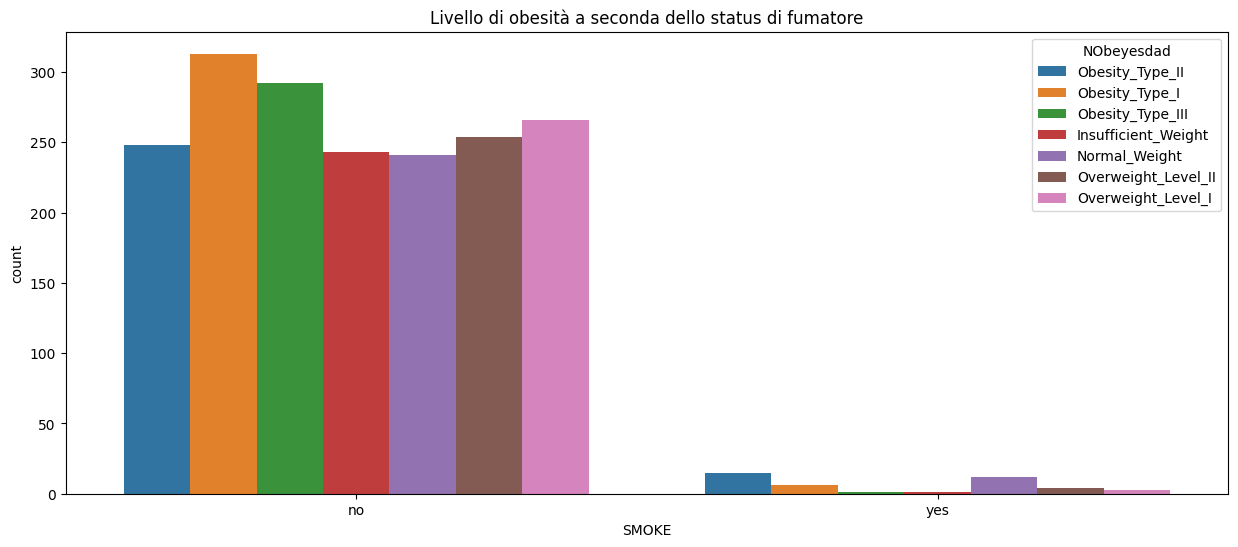

In [8]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training_4_print, x="SMOKE", hue="NObeyesdad")
plt.title("Livello di obesità a seconda dello status di fumatore")
plt.show()

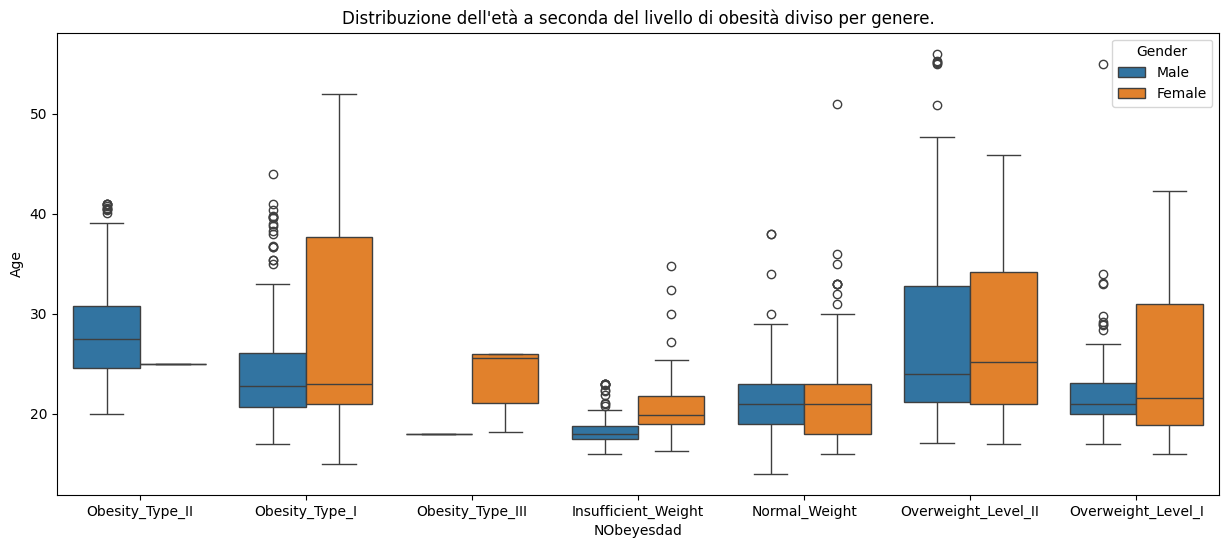

In [9]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset_training_4_print, x="NObeyesdad", y="Age", hue="Gender")
plt.title("Distribuzione dell'età a seconda del livello di obesità diviso per genere.")
plt.show()

In [10]:
# Task 1 Homework

import math

# # FASE I: Preparazione del dataset
# # Creo dei dizionari per ogni campo non numerico del dataset con i valori possibili che possono assumere
# gender_map = {
#     "Male": 0, "Female": 1
# }
# yesNo_map = {
#     "yes": 0, "no": 1
# }
# caec_map = {
#     "Always": 0, "Frequently": 1, "no": 2, "Sometimes": 3
# }
# calc_map = {
#     "Always": 0, "Frequently": 1, "no": 3, "Sometimes": 2
# }
# mtrans_map = {
#     "Automobile": 0, "Bike": 1, "Motorbike": 2, "Public_Transportation": 3, "Walking": 4
# }
# # Osservazione: ordinare gli indici in base alla fascia di peso migliora decisamente il risultato del train
# nobeyesdad_map = {
#     "Overweight_Level_I":2 , "Overweight_Level_II": 3, "Obesity_Type_I": 4, "Obesity_Type_II": 5,
#     "Obesity_Type_III": 6, "Normal_Weight": 1, "Insufficient_Weight": 0
# }

# #warnings.filterwarnings('ignore')

# # Sostituisco tutti i valori dei campi che non hanno un dominio numerico con valori
# # numerici sfruttando i dizionari creati
# dataset_training.Gender.replace(gender_map, inplace=True)
# dataset_training.family_history_with_overweight.replace(yesNo_map, inplace=True)
# dataset_training.FAVC.replace(yesNo_map, inplace=True)
# dataset_training.CAEC.replace(caec_map, inplace=True)
# dataset_training.SMOKE.replace(yesNo_map, inplace=True)
# dataset_training.SCC.replace(yesNo_map, inplace=True)
# dataset_training.CALC.replace(calc_map, inplace=True)
# dataset_training.MTRANS.replace(mtrans_map, inplace=True)
# dataset_training.NObeyesdad.replace(nobeyesdad_map, inplace=True)

# Estraggo il vettore y prendendo la colonna dei pesi (dato da inferire)
yTraining = dataset_training_dummies.Weight
yTraining = yTraining.to_numpy()

# Rimuovo il campo pesi dal dataset di training in modo da avere la nostra matrice X
XTraining = dataset_training_dummies.drop(["Weight"], axis=1)
XTraining.insert(0, "bias", 1, False)

X = XTraining.to_numpy()
print(X)

# Calcolo c = (XTX)-1XTY

pinv=np.linalg.pinv(X)
# print(type(pinv))
# print(type(yTraining))
c=pinv@yTraining


# Testo il training Y’ = cTX
yAttesa = dataset_test_dummies.Weight
yAttesa = yAttesa.to_numpy()
dataset_test = dataset_test_dummies.drop(["Weight"], axis=1)
dataset_test.insert(0, "bias", 1, allow_duplicates=False)
# dataset_test.Gender.replace(gender_map, inplace=True)
# dataset_test.family_history_with_overweight.replace(yesNo_map, inplace=True)
# dataset_test.FAVC.replace(yesNo_map, inplace=True)
# dataset_test.CAEC.replace(caec_map, inplace=True)
# dataset_test.SMOKE.replace(yesNo_map, inplace=True)
# dataset_test.SCC.replace(yesNo_map, inplace=True)
# dataset_test.CALC.replace(calc_map, inplace=True)
# dataset_test.MTRANS.replace(mtrans_map, inplace=True)
# dataset_test.NObeyesdad.replace(nobeyesdad_map, inplace=True)
XTest = dataset_test.to_numpy()

yTest = np.dot(XTest,c)

# Valuto la qualità del training


def MSE(yAttesa, yInferita):
    sum = 0
    scarto = yInferita-yAttesa
    sum = np.dot(scarto,scarto)
    # for i in range(len(yAttesa)):
    #     scarto = yInferita[i]-yAttesa[i]
    #     scarto = math.pow(scarto,2)
    #     sum += scarto
    sum = sum/len(yAttesa)
    return sum

print(MSE(yAttesa,yTest))

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X, yTraining)

y_pred = model.predict(XTest)

print(MSE(yAttesa,y_pred))


[[ 1.       27.439056  1.785277 ...  0.        0.        0.      ]
 [ 1.       26.684354  1.819535 ...  0.        0.        0.      ]
 [ 1.       32.29016   1.754956 ...  0.        0.        0.      ]
 ...
 [ 1.       47.283374  1.643786 ...  0.        0.        0.      ]
 [ 1.       22.675679  1.823765 ...  0.        0.        1.      ]
 [ 1.       21.        1.63     ...  0.        0.        0.      ]]
24.41838461732792
24.41838461732553


In [23]:
# Task 2 Homework: Learning Decision Trees
# TODO: Il dataset va modificato in modo da classificare in modo binario gli esempi dati

dataset_training_lds = dataset_training

# TODO: Va scelto il tipo dei seguenti attributi
# - esempi: matrice o dataset se posso accedere con gli indici posizionali ai campi del dataset
# - attributi: lista di indici

# # Creo dei dizionari per ogni campo non numerico del dataset con i valori possibili che possono assumere
gender_map = {
    "Male": 0, "Female": 1
}
yesNo_map = {
    "yes": 0, "no": 1
}
caec_map = {
    "Always": 0, "Frequently": 1, "no": 2, "Sometimes": 3
}
calc_map = {
    "Always": 0, "Frequently": 1, "no": 3, "Sometimes": 2
}
mtrans_map = {
    "Automobile": 0, "Bike": 1, "Motorbike": 2, "Public_Transportation": 3, "Walking": 4
}
nobeyesdad_map = {
    "Overweight_Level_I":0 , "Overweight_Level_II": 0, "Obesity_Type_I": 1, "Obesity_Type_II": 1,
    "Obesity_Type_III": 1, "Normal_Weight": 0, "Insufficient_Weight": 0
}

# Osservazione: ordinare gli indici in base alla fascia di peso migliora decisamente il risultato del train

# Sostituisco tutti i valori dei campi che non hanno un dominio numerico con valori
# numerici sfruttando i dizionari creati


dataset_training_lds.Gender.replace(gender_map, inplace=True)
dataset_training_lds.family_history_with_overweight.replace(yesNo_map, inplace=True)
dataset_training_lds.FAVC.replace(yesNo_map, inplace=True)
dataset_training_lds.CAEC.replace(caec_map, inplace=True)
dataset_training_lds.SMOKE.replace(yesNo_map, inplace=True)
dataset_training_lds.SCC.replace(yesNo_map, inplace=True)
dataset_training_lds.CALC.replace(calc_map, inplace=True)
dataset_training_lds.MTRANS.replace(mtrans_map, inplace=True)
dataset_training_lds.NObeyesdad.replace(nobeyesdad_map, inplace=True)

# Creazione dizionari utilizzati per dividere i rami degli alberi

disc = {
    0: [0,1],
    1: [0,20,30],
    2: [0,1.70,1.85],
    3: [0,60,80,120],
    4: [0,1],
    5: [0,1],
    6: [0,2,3],
    7: [0,2,3],
    8: [0,1,2,3],
    9: [0,1],
    10: [0,1,2.5],
    11: [0,1],
    12: [0,1,2],
    13: [0,1],
    14: [0,1,2,3],
    15: [0,1,2,3,4]
}

listaAttributi = list(range(16))

# trasformo il dataset in una lista di liste
# per ogni lista ho una riga corrispondente al dataset
list_df = [row.tolist() for index, row in dataset_training_lds.iterrows()]


class NodoAlbero:
    
    def __init__(self, esempi, attributiDisponibili):
        # tengo traccia in ogni nodo degli esempi utilizzati per dividerlo in più rami
        # e degli attributi disponibili
        self.esempi = esempi
        self.attributiDisponibili = attributiDisponibili
        # mi assicuro che il nodo non contenga solo esempi con lo stesso esito
        if(self.estFoglia()):
            # se si indico che il nodo è un nodo foglia e mi salvo l'esito da registrarmi
            self.esito = esempi[0].Esito
            self.foglia = True
        else:
            # se gli esempi sono diversificati in termini di esiti
            # indico che non si tratta di una foglia
            self.foglia = False
            # individuo l'attributo con il Gain più alto
            self.attributo = self.trovaAttributo()
            # lo rimuovo dalla lista degli attributi da andare a controllare nelle prossime iterazioni
            self.attributiDisponibili.remove(self.attributo)
            # definisco una struttura dati che andrà a contenere tutti i nodi rami
            self.branches = []
            # definisco una struttura dati che andrà a contenere tutte le liste di esempi da smistare
            esempiBranch = []
            # itero sui valori contenuti nel campo del dizionario corrispondente all'attributo individuato
            for i in range(len(disc[self.attributo])-1):
                # lista che conterrà gli esempi nei vari range dettati dal dizionario
                lista = []
                # itero sulle righe del dataset
                for r in esempi:
                    # se il valore dell'attributo rientra nella fascia analizzata
                    if(r[self.attributo]>=disc[self.attributo][i] and r[self.attributo]<disc[self.attributo][i+1]):
                        # aggiungo alla lista di esempi la riga
                        lista.append[r]
                        # TODO: rimuovere le righe inserite nella lista dal dataset per velocizzare il training
                # aggiungo la lista di esempi alla struttura dati
                esempiBranch.append(lista)
            # inserisco tutte le altre righe nell'ultimo campo esempio
            # TODO: se rimuovo gli esempi alla fine inserirò senza controlli le righe restanti
            lista = []
            for r in esempi:
                if(r[self.attributo]>disc[self.attributo][len(disc[self.attributo]-1)]):
                        lista.append[r]
            esempiBranch.append(lista)
            # per ogni fascia appartenente all'attributo chiamo un costruttore nodo passando gli esempi
            # della rispettiva diramazione e la lista di attributi disponibili
            for b in range(len(esempiBranch)):
                self.branches.append(NodoAlbero(esempiBranch[b],attributiDisponibili))
        return
    
    def inferisci(self, x):
        if(self.estFoglia):
            return self.esito
        else:
            # TODO: va analizzato in che range del rispettivo attributo ci troviamo
            # per poi indirizzare la ricerca nel giusto ramo
            return 0
            
    def estFoglia(self):
        esito = self.esempi[0][16]
        for r in self.esempi:
            if(r[16]!=esito):
                return False
        return True
    
    def trovaAttributo(self):
        # TODO: calcola l'attributo col gain di entropia maggiore e lo restituisce
        return self.attributiDisponibili[0]
    
    def calcolaEntropia(self, attributo):
        # TODO: calcola l'entropia di una suddivisione secodo l'attributo dato
        return 0



C:\Users\feder\AppData\Local\Temp\ipykernel_18016\4050571144.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_training_lds.Gender.replace(gender_map, inplace=True)
C:\Users\feder\AppData\Local\Temp\ipykernel_18016\4050571144.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_training_lds.family_history_with_overweight.replace(yesNo_map, inplace=True)
C:\Users\feder\AppData\Local\Temp\ipykernel_18016\4050571144.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui